# NSL Notebook 11

In [1]:
from default import *

## Exercise 11.1

In this exercise we would like to make a 1d linear regression using simple model of NN.

$$ f(x) = m*x + b \qquad x \in \left[-1,\,1\right]$$

The idea is to tune the model parameters to achive the best fit. Surely are important the:

- dimension of training dataset, I set it to $1000$
- the strutture of the model, in this case can be very simple, usually it is advisable to follow the empirical rule #hidden_layers = 2/3 * #input_layers
- the activation function that in this case is the default one: [linear activation](https://keras.io/api/layers/core_layers/dense/) $a(x)=x$

In [2]:
# Create Layers
model = Sequential()
model.add(Dense(2, input_shape=(1,)))
model.add(Dense(1))
model.add(Dense(1))

# Compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

# Get a summary of our composed model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 4         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 3         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 2         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [3]:
# Target parameters of f(x) = m*x + b
m = 2
b = 1

# Generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 1000)
x_valid = np.random.uniform(-1, 1, 100)
x_valid.sort()
y_target = m * x_valid + b

sigma = 0.0
y_train = np.random.normal(m * x_train + b, sigma)
y_valid = np.random.normal(m * x_valid + b, sigma)

In [4]:
# Fit the model using training dataset
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=50,
          shuffle=True,
          validation_data=(x_valid, y_valid))

Epoch 1/50
32/32 [==============================] - 0s 9ms/step - loss: 1.6197 - mse: 1.6197 - val_loss: 1.3571 - val_mse: 1.3571
Epoch 2/50
32/32 [==============================] - 0s 3ms/step - loss: 1.0306 - mse: 1.0306 - val_loss: 0.9493 - val_mse: 0.9493
Epoch 3/50
32/32 [==============================] - 0s 3ms/step - loss: 0.6059 - mse: 0.6059 - val_loss: 0.4073 - val_mse: 0.4073
Epoch 4/50
32/32 [==============================] - 0s 2ms/step - loss: 0.1806 - mse: 0.1806 - val_loss: 0.0602 - val_mse: 0.0602
Epoch 5/50
32/32 [==============================] - 0s 2ms/step - loss: 0.0190 - mse: 0.0190 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 6/50
32/32 [==============================] - 0s 3ms/step - loss: 9.3468e-04 - mse: 9.3468e-04 - val_loss: 1.3317e-04 - val_mse: 1.3317e-04
Epoch 7/50
32/32 [==============================] - 0s 3ms/step - loss: 3.5671e-05 - mse: 3.5671e-05 - val_loss: 4.7159e-06 - val_mse: 4.7159e-06
Epoch 8/50
32/32 [==============================] - 0s 3ms

In [5]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])

4/4 [==============================] - 0s 12ms/step - loss: 2.4095e-12 - mse: 2.4095e-12

Test loss: 2.409482552714892e-12


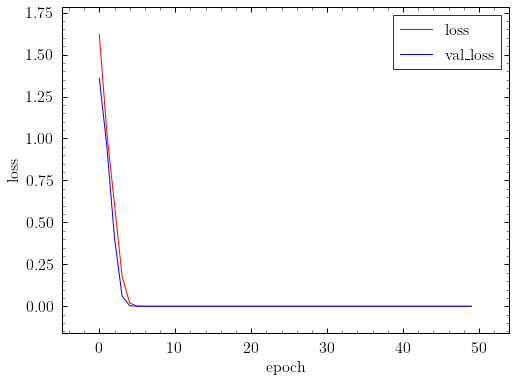

In [9]:
fig, ax = plt.subplots(figsize=(8,6));

df = pd.DataFrame(history.history)
df['loss'].plot.line(c='r', label='loss', ax=ax);
df['val_loss'].plot.line(c='b', label='val\_loss', ax=ax);

ax.legend()
ax.set_xlabel('epoch');
ax.set_ylabel('loss');

As we can see above, the loss of the model (the function to be minimized during the optimization process) steadily decrease, so there is no need to increase the number of training epochs. 

Below the result of the NN regression:

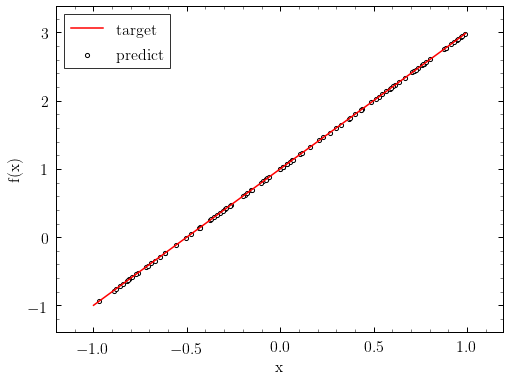

In [10]:
fig, ax = plt.subplots(figsize=(8,6));

x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)

ax.scatter(x_predicted, y_predicted, 
           color='k', 
           marker='o', 
           facecolors="w", 
           s=17, 
           label='predict');
ax.plot(x_valid, y_target, 'r-', lw=1.5, label='target');

ax.legend()
ax.set_xlabel('x');
ax.set_ylabel('f(x)');

## Exercise 11.2

In this exercise we would like to make a 1d polynomial regression using simple model of NN.

$$ f(x) = a - b*x - c*x^2 + d*x^3 \qquad x \in \left[-1,\,1\right] $$

Given the trend less constant, definitely you will be needed more layers and denser dataset. So I chose:

- training dataset size, $10^4$
- input layers $100$ so $2/3 * 100 \simeq 66$ 
- activate function **relu** because works better than the simple **linear**

In [11]:
# Create Layers
model_p = Sequential()
model_p.add(Dense(100, input_shape=(1,), activation='relu'))
model_p.add(Dense(66, activation='relu'))
model_p.add(Dense(1))

# Compile the model choosing optimizer, loss and metrics objects
model_p.compile(optimizer='sgd', loss='mse', metrics=['mse'])

# Get a summary of our composed model
model_p.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 100)               200       
_________________________________________________________________
dense_4 (Dense)              (None, 66)                6666      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 67        
Total params: 6,933
Trainable params: 6,933
Non-trainable params: 0
_________________________________________________________________


In [12]:
# Target parameters of f(x) = 4 - 3*x - 2*x^2 + 3*x^3
a = 4
b = -3
c = -2
d = 3

pol = lambda x: a + b * x + c * x**2 + d * x**3

# Generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, int(1e4))
x_tail = np.random.uniform(0.7, 1, int(3e3))
x_train = np.concatenate((x_train,x_tail), axis=None)
x_valid = np.random.uniform(-1, 1, int(1e3))
x_tail = np.random.uniform(0.7, 1, int(3e2))
x_valid = np.concatenate((x_valid,x_tail), axis=None)
x_valid.sort()
y_target = pol(x_valid)

sigma = 0.0
y_train = np.random.normal(pol(x_train), sigma)
y_valid = np.random.normal(pol(x_valid), sigma)

In [13]:
# Fit the model using training dataset
history = model_p.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=50,
          validation_data=(x_valid, y_valid))

Epoch 1/50
407/407 [==============================] - 1s 2ms/step - loss: 0.4870 - mse: 0.4870 - val_loss: 0.1285 - val_mse: 0.1285
Epoch 2/50
407/407 [==============================] - 1s 2ms/step - loss: 0.0682 - mse: 0.0682 - val_loss: 0.0404 - val_mse: 0.0404
Epoch 3/50
407/407 [==============================] - 1s 2ms/step - loss: 0.0268 - mse: 0.0268 - val_loss: 0.0201 - val_mse: 0.0201
Epoch 4/50
407/407 [==============================] - 1s 2ms/step - loss: 0.0155 - mse: 0.0155 - val_loss: 0.0141 - val_mse: 0.0141
Epoch 5/50
407/407 [==============================] - 1s 2ms/step - loss: 0.0106 - mse: 0.0106 - val_loss: 0.0093 - val_mse: 0.0093
Epoch 6/50
407/407 [==============================] - 1s 2ms/step - loss: 0.0080 - mse: 0.0080 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 7/50
407/407 [==============================] - 1s 2ms/step - loss: 0.0064 - mse: 0.0064 - val_loss: 0.0059 - val_mse: 0.0059
Epoch 8/50
407/407 [==============================] - 1s 2ms/step - loss: 0.

In [15]:
# evaluate model
score = model_p.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])

41/41 [==============================] - 0s 6ms/step - loss: 4.1103e-04 - mse: 4.1103e-04

Test loss: 0.00041103141847997904


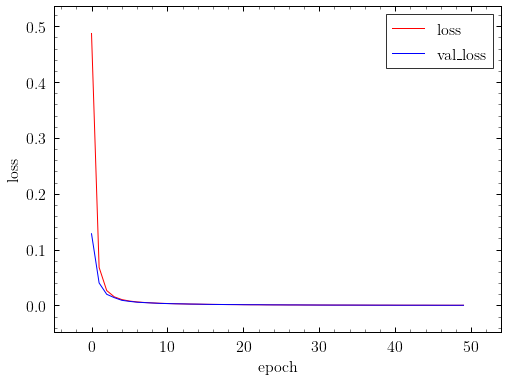

In [16]:
fig, ax = plt.subplots(figsize=(8,6));

df = pd.DataFrame(history.history)
df['loss'].plot.line(c='r', label='loss', ax=ax);
df['val_loss'].plot.line(c='b', label='val\_loss', ax=ax);

ax.legend()
ax.set_xlabel('epoch');
ax.set_ylabel('loss');

As we can see above, the loss of the model (the function to be minimized during the optimization process) steadily decrease, so there is no need to increase the number of training epochs. 

Below the result of the NN regression.

There is a little problem, for the polynomial parameters choice $\{a=4,\,b=-3,\,c=-2,\,d=3\}$, there is change of slope at the edge interval around $1$, so the model is not able to fit well that portion of curve, because was not trained with $x>1$ so weights much more the previous trend of the function. 

I tried to mitigate the problem (during the training step) increasing the dataset size around $1$, adding $10^3$ points evenly distributed around $[0.7,\,1]$

Small improvements are visible, probably a dataset that extends over the $1$ will fit better at the end.

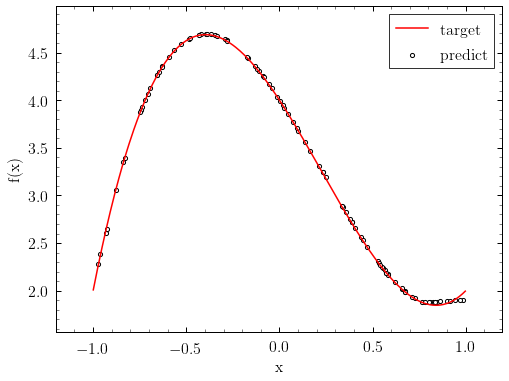

In [17]:
fig, ax = plt.subplots(figsize=(8,6));

x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model_p.predict(x_predicted)

ax.scatter(x_predicted, y_predicted, 
           color='k', 
           marker='o', 
           facecolors="w", 
           s=17, 
           label='predict');
ax.plot(x_valid, y_target, 'r-', lw=1.5, label='target');

ax.legend()
ax.set_xlabel('x');
ax.set_ylabel('f(x)');

## Exercise 11.3

In this exercise we would like to make a 3d function regression using simple model of NN.

$$ f(x,y) = \sin(x^2 + y^2) $$

I try to re-use the same model of the previous exercise:

- training dataset size, $10^4$ for both the directions $x,\,y$
- input layers $100$ so $2/3 * 100 \simeq 66$ 
- activate function **relu**

In [18]:
# Create Layers
model_2 = Sequential()
model_2.add(Dense(100, input_shape=(2,), activation='relu'))
model_2.add(Dense(66, activation='relu'))
model_2.add(Dense(1))

# Compile the model choosing optimizer, loss and metrics objects
model_2.compile(optimizer='sgd', loss='mse', metrics=['mse'])

# Get a summary of our composed model
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 100)               300       
_________________________________________________________________
dense_7 (Dense)              (None, 66)                6666      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 67        
Total params: 7,033
Trainable params: 7,033
Non-trainable params: 0
_________________________________________________________________


In [19]:
# f(x,y) = sin(x^2 + y^2)

sin_2 = lambda xy: np.sin(xy.T[0]**2 + xy.T[1]**2)

# Generate training inputs
np.random.seed(0)
xy_train = np.random.uniform(-3/2, 3/2, size=(int(1e4),2))
xy_valid = np.random.uniform(-3/2, 3/2, size=(int(1e4),2))
z_target = sin_2(xy_valid)

sigma = 0.0
z_train = np.random.normal(sin_2(xy_train), sigma)
z_valid = np.random.normal(sin_2(xy_valid), sigma)

In [20]:
# Fit the model using training dataset
history = model_2.fit(x=xy_train, y=z_train, 
          batch_size=32, epochs=50,
          validation_data=(xy_valid, z_valid))

Epoch 1/50
313/313 [==============================] - 1s 3ms/step - loss: 0.1606 - mse: 0.1606 - val_loss: 0.1325 - val_mse: 0.1325
Epoch 2/50
313/313 [==============================] - 1s 3ms/step - loss: 0.1335 - mse: 0.1335 - val_loss: 0.1231 - val_mse: 0.1231
Epoch 3/50
313/313 [==============================] - 1s 3ms/step - loss: 0.1243 - mse: 0.1243 - val_loss: 0.1156 - val_mse: 0.1156
Epoch 4/50
313/313 [==============================] - 1s 3ms/step - loss: 0.1163 - mse: 0.1163 - val_loss: 0.1076 - val_mse: 0.1076
Epoch 5/50
313/313 [==============================] - 1s 3ms/step - loss: 0.1084 - mse: 0.1084 - val_loss: 0.1001 - val_mse: 0.1001
Epoch 6/50
313/313 [==============================] - 1s 2ms/step - loss: 0.0999 - mse: 0.0999 - val_loss: 0.0918 - val_mse: 0.0918
Epoch 7/50
313/313 [==============================] - 1s 2ms/step - loss: 0.0911 - mse: 0.0911 - val_loss: 0.0831 - val_mse: 0.0831
Epoch 8/50
313/313 [==============================] - 1s 3ms/step - loss: 0.

In [21]:
# evaluate model
score = model_2.evaluate(xy_valid, z_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])

313/313 [==============================] - 1s 2ms/step - loss: 5.4352e-04 - mse: 5.4352e-04

Test loss: 0.0005435238126665354


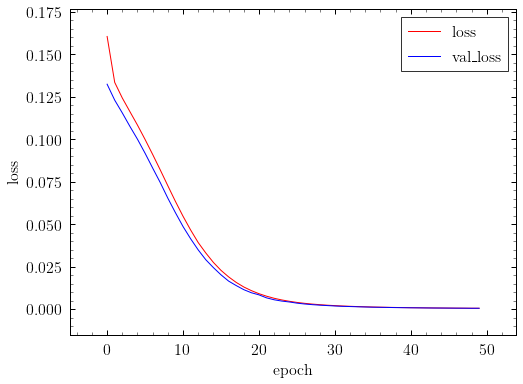

In [22]:
fig, ax = plt.subplots(figsize=(8,6));

df = pd.DataFrame(history.history)
df['loss'].plot.line(c='r', label='loss', ax=ax);
df['val_loss'].plot.line(c='b', label='val\_loss', ax=ax);

ax.legend()
ax.set_xlabel('epoch');
ax.set_ylabel('loss');

As we can see above, the loss of the model (the function to be minimized during the optimization process) steadily decrease, so there is no need to increase the number of training epochs. 

Below the result of the NN regression.

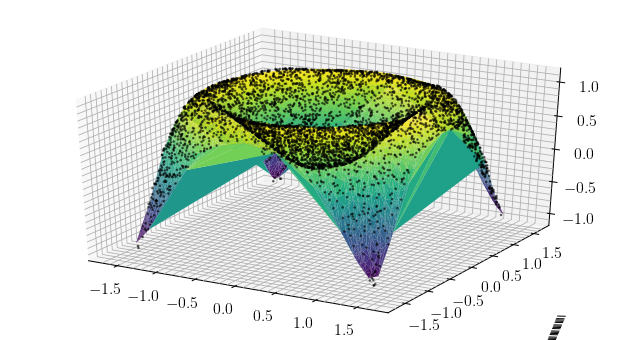

In [23]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

xy_predicted = np.random.uniform(-3/2, 3/2, size=(int(5e3),2))
z_predicted = model_2.predict(xy_predicted)

ax.scatter(xy_predicted.T[0], 
           xy_predicted.T[1], 
           z_predicted, 
           color='k', 
           alpha=0.5, 
           marker='.', 
           s=10);
ax.plot_trisurf(xy_valid.T[0], 
                xy_valid.T[1], 
                z_target, 
                cmap='viridis', 
                edgecolor='none');
